In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [60]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
print(df)



Saving index.csv to index (2).csv
            date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
1128  2024-07-31  2024-07-31 20:53:35.077      card  ANON-0000-0000-0443   
1129  2024-07-31  2024-07-31 20:59:25.013      card  ANON-0000-0000-0040   
1130  2024-07-31  2024-07-31 21:26:26.000      card  ANON-0000-0000-0444   
1131  2024-07-31  2024-07-31 21:54:11.824      card  ANON-0000-0000-0445   
1132  2024-07-31  2024-07-31 21:55:16.570      card  ANON-0000-0000-0446   

      money          coffee_name  
0     38.70       

In [61]:
data=pd.read_csv('index.csv')
data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [62]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [64]:
data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [65]:
data.duplicated().sum()

0

In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [67]:
data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


In [68]:
data[data['card'].isnull()]['cash_type'].value_counts()

,count
cash_type,
cash,89


<Axes: >

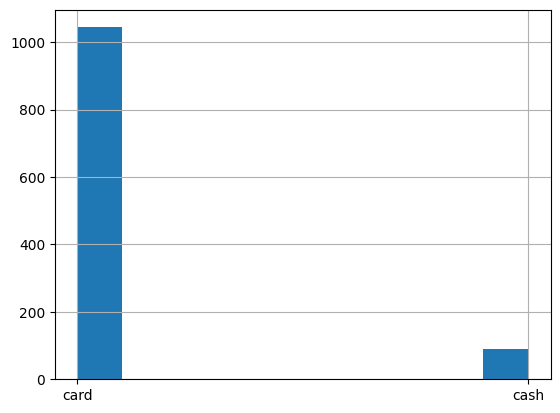

In [69]:
data['cash_type'].hist()

In [70]:
data['cash_type'].value_counts(normalize=True)

,proportion
cash_type,
card,0.921447
cash,0.078553


In [71]:
pd.DataFrame(data['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [72]:
data['date']=pd.to_datetime(data['date'])
data['datetime']=pd.to_datetime(data['datetime'])
data['month']=data['date'].dt.strftime('%Y.%m')
data['day']=data['date'].dt.strftime('%w')
data['hour']=data['datetime'].dt.strftime('%H')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [74]:
data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024.03,5,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024.03,5,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024.03,5,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024.03,5,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024.03,5,13


In [75]:
[data['date'].min(),data['date'].max()]

[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00')]

In [21]:
revenue_data=data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

Text(0.5, 0, 'Revenue')

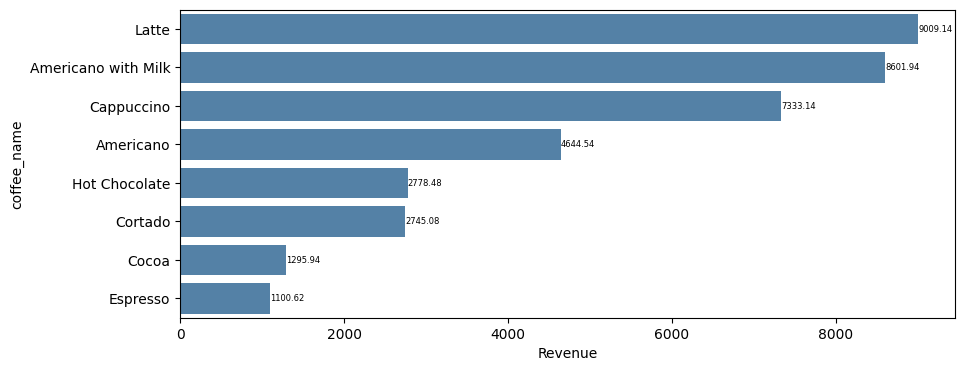

In [76]:
plt.figure(figsize=(10,4))
ax=sns.barplot(data=revenue_data,x='money',y='coffee_name',color='steelblue')
ax.bar_label(ax.containers[0],fontsize=6)
plt.xlabel('Revenue')

In [77]:
# Group by 'coffee_name' and 'month', count 'date', and reshape the data
monthly_sales =data.groupby(["coffee_name", "month"]).count()["date"].reset_index().rename(columns={"date": "count"}).pivot(index="month", columns="coffee_name", values="count").reset_index()
monthly_sales


coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024.03,36,34,20,6,30,10,22,48
1,2024.04,35,42,43,6,19,7,13,31
2,2024.05,48,58,55,9,17,8,14,58
3,2024.06,14,69,46,5,19,10,14,50
4,2024.07,36,65,32,9,14,14,11,56


In [78]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


([<matplotlib.axis.XTick at 0x7e1a487a7160>,
 [Text(0, 0, '2024.03'),
  Text(1, 0, '2024.04'),
  Text(2, 0, '2024.05'),
  Text(3, 0, '2024.06'),
  Text(4, 0, '2024.07')])

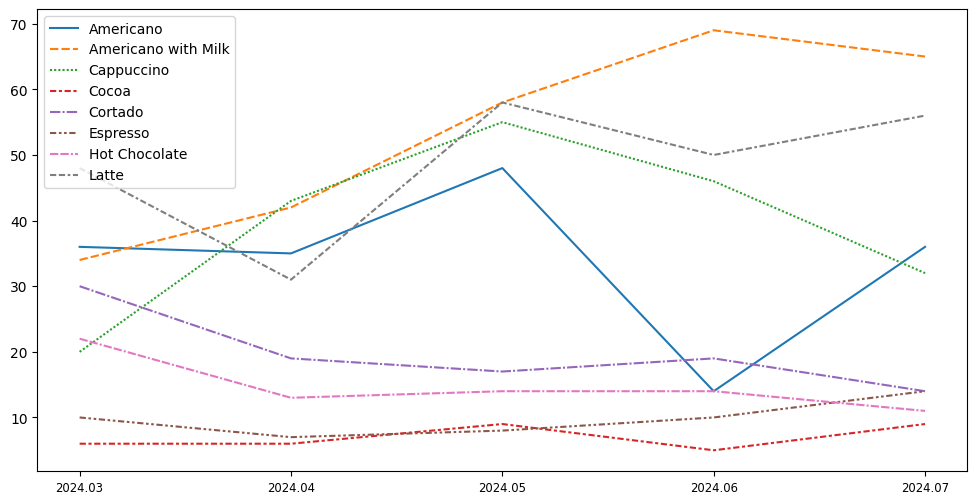

In [79]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')

In [80]:
weekday_sales=data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


([<matplotlib.axis.XTick at 0x7e1a483fc430>,
 [Text(0, 0, 'sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thu'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

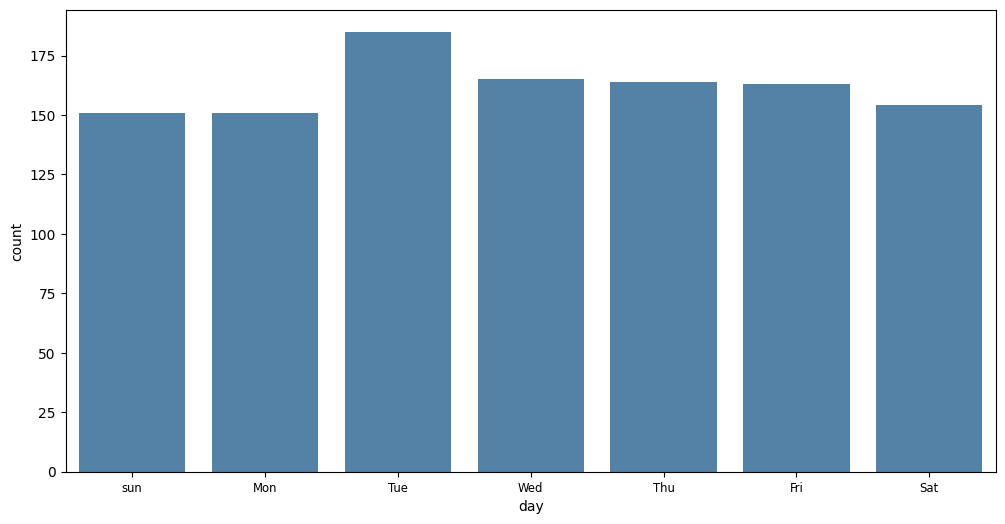

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day',y='count',color='steelblue')
plt.xticks(range(len(weekday_sales['day'])),['sun','Mon','Tue','Wed','Thu','Fri','Sat'],size='small')

In [82]:
daily_sales = data.groupby(['coffee_name','date']).count()['datetime'].reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count')
daily_sales

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
date,,,,,,,,
2024-03-01,1.0,4.0,NaN,1.0,NaN,NaN,3.0,2.0
2024-03-02,3.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
2024-03-03,1.0,2.0,NaN,1.0,2.0,NaN,2.0,2.0
2024-03-04,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2.0
2024-03-05,NaN,NaN,NaN,1.0,1.0,NaN,4.0,3.0
...,...,...,...,...,...,...,...,...
2024-07-27,NaN,5.0,4.0,NaN,NaN,2.0,NaN,2.0
2024-07-28,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0
2024-07-29,3.0,2.0,2.0,1.0,NaN,NaN,2.0,1.0


In [83]:
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano with Milk,1.0,12.0
Cappuccino,1.0,9.0
Cocoa,1.0,2.0
Cortado,1.0,4.0
Espresso,1.0,4.0
Hot Chocolate,1.0,4.0
Latte,1.0,7.0


In [45]:
hourly_sales=data.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

,hour,count
0,07,13
1,08,44
2,09,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


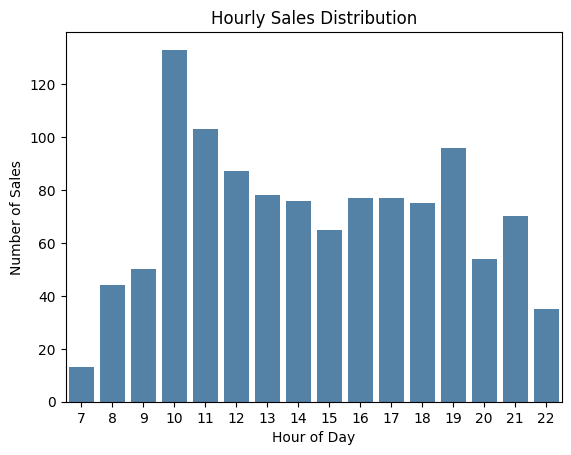

In [90]:
# Example data preparation
hourly_sales = data.groupby(data['datetime'].dt.hour).size().reset_index(name='count')
hourly_sales.rename(columns={0: 'count', 'datetime': 'hour'}, inplace=True)

# Plot
sns.barplot(data=hourly_sales, x='hour', y='count', color='steelblue')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Sales")
plt.title("Hourly Sales Distribution")
plt.show()


In [95]:
hourly_sales=data.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count')
hourly_sales

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
hour,,,,,,,,
07,5.0,4.0,1.0,NaN,1.0,NaN,NaN,2.0
08,10.0,7.0,8.0,1.0,6.0,NaN,NaN,12.0
09,8.0,16.0,6.0,1.0,5.0,3.0,NaN,11.0
10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
15,14.0,15.0,8.0,NaN,3.0,4.0,6.0,15.0


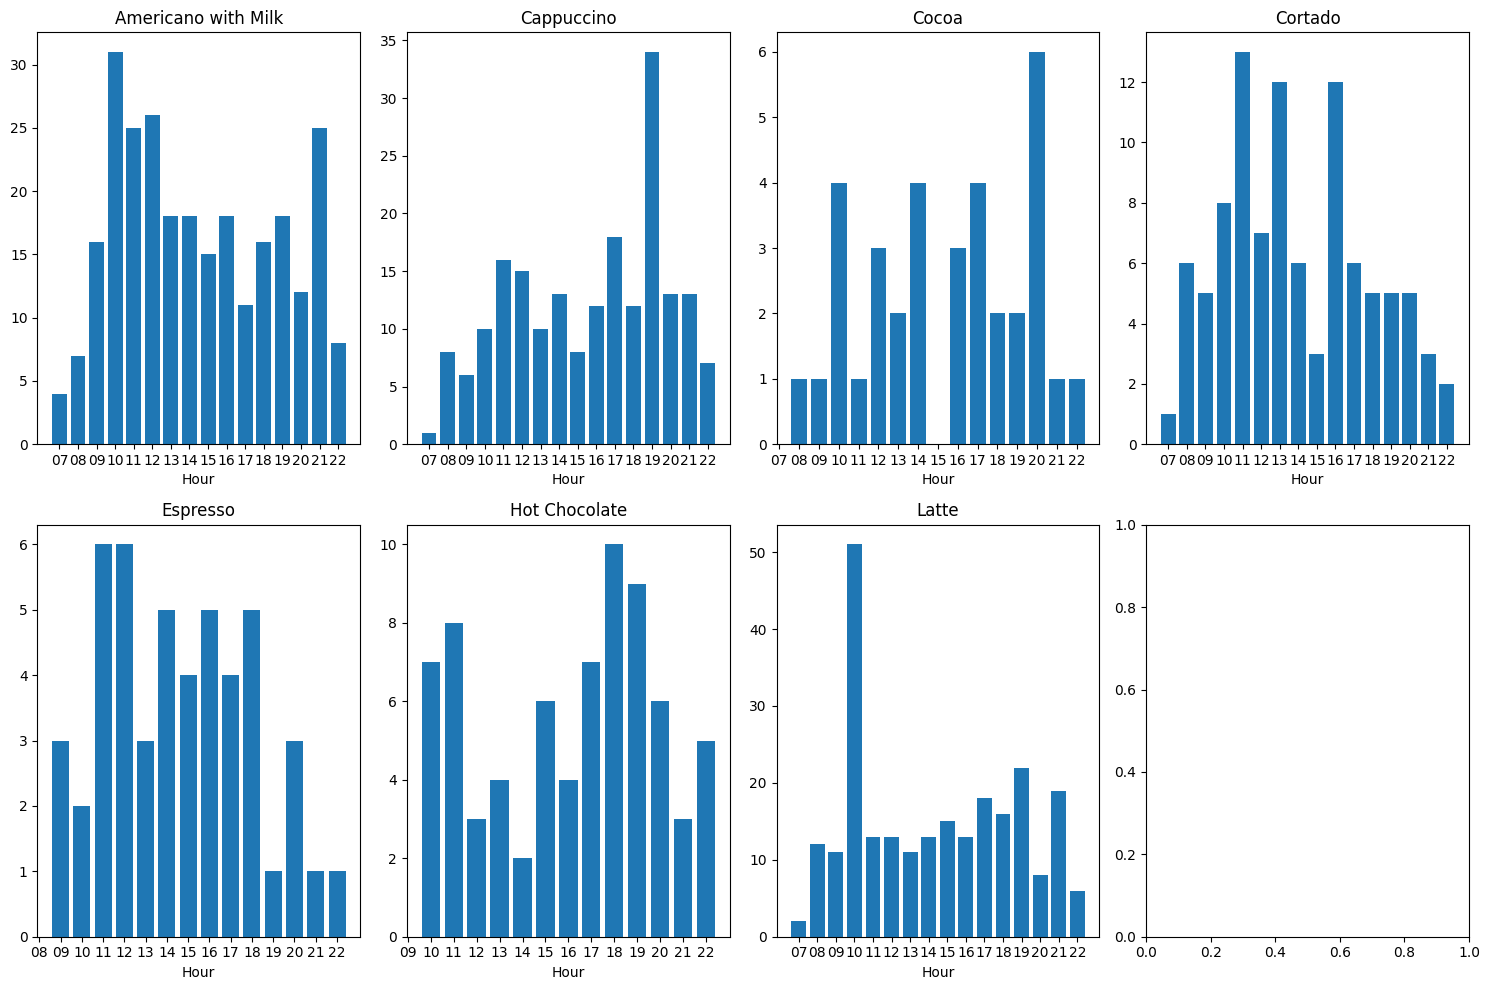

In [96]:
fig, axs=plt.subplots(2,4,figsize=(15,10))
axs= axs.flatten()

for i, column in enumerate(hourly_sales.columns[1:]):
    axs[i].bar(hourly_sales.index,hourly_sales[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')

plt.tight_layout()
plt.show()